In [2]:
import numpy as np
import sqlite3 as sq
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from colors import Colors
import pandas as pd
import requests
import time
%matplotlib inline

In [3]:
connection = sq.connect("./measurements.db")
connection.row_factory = sq.Row

In [4]:
def quicIPs():
    sql = """
    SELECT DISTINCT ip FROM dns_measurements WHERE protocol = 'quic' AND r_code IS NOT NULL
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

ips = quicIPs()

In [5]:
data = {}
try:
    df = pd.read_csv("ip-location.csv")
    for index, row in df.iterrows():
        data[row["ip"]] = row
except:
    pass
for row in ips:
    if row["ip"] in data:
        continue
    r = requests.get("http://ip-api.com/json/" + row["ip"])
    json = r.json()
    data[row["ip"]] = {
        "country": json["country"],
        "countryCode": json["countryCode"],
        "region": json["region"],
        "regionName": json["regionName"],
        "city": json["city"],
        "zip": json["zip"],
        "lat": json["lat"],
        "lon": json["lon"],
        "org": json["org"],
        "as": json["as"],
        "ip": row["ip"]
    }
    time.sleep(2)
df = pd.DataFrame.from_dict(data, orient = "index")
df.to_csv("ip-location.csv", index = False)

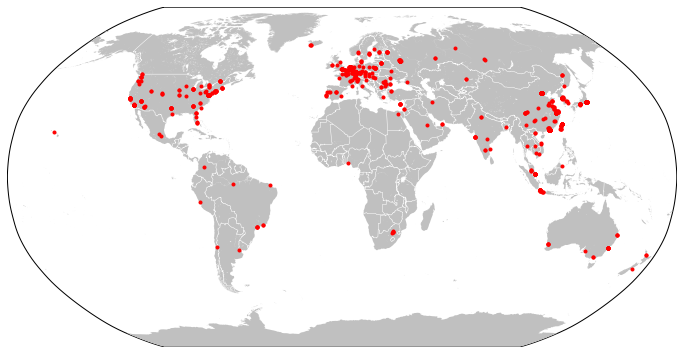

In [6]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
plt.figure(figsize=(12,22))
worldMap = Basemap(projection='robin', lon_0=0, resolution='h')
worldMap.drawcountries(color='#ffffff', linewidth=0.5)
worldMap.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
x, y = worldMap(df["lon"].tolist(), df["lat"].tolist())
plt.plot(x, y, 'bo', color = 'r', markersize = 3)
plt.show()

## Slowest Servers

### QUIC

In [7]:
df = pd.read_sql_query("SELECT * FROM dns_measurements WHERE protocol = 'quic' AND r_code IS NOT NULL AND NOT cache_warming", connection)
grouped_df = df.groupby("ip")
mean_df = grouped_df["total_time"].mean()
mean_df = mean_df.reset_index()
largestQUIC = mean_df.nlargest(20, "total_time")

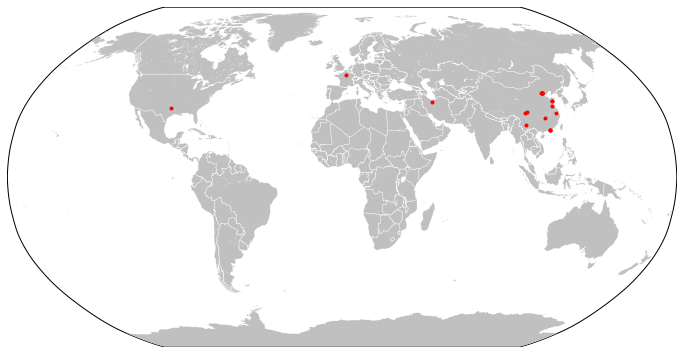

In [9]:
ips = largestQUIC["ip"].tolist()
locations = []
for ip in ips:
    if ip in data:
        locations.append({ "lon": data[ip]["lon"], "lat": data[ip]["lat"] })

# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
plt.figure(figsize=(12,22))
worldMap = Basemap(projection='robin', lon_0=0, resolution='i')
worldMap.drawcountries(color='#ffffff', linewidth=0.5)
worldMap.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
x, y = worldMap(list(map(lambda x: x["lon"], locations)), list(map(lambda x: x["lat"], locations)))
plt.plot(x, y, 'bo', color = "r", markersize = 3)
plt.show()

### UDP

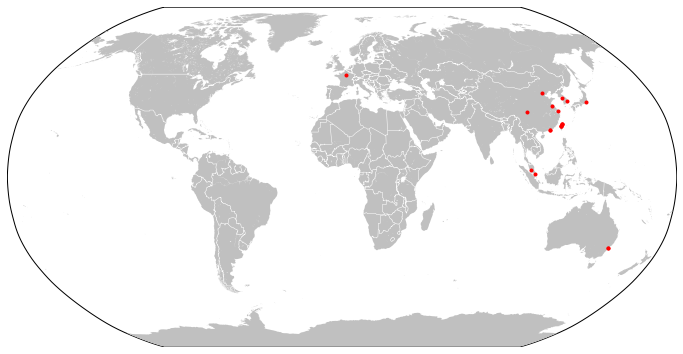

In [11]:
df = pd.read_sql_query("SELECT * FROM dns_measurements WHERE protocol = 'udp' AND r_code IS NOT NULL AND NOT cache_warming", connection)
grouped_df = df.groupby("ip")
mean_df = grouped_df["total_time"].mean()
mean_df = mean_df.reset_index()
largestUDP = mean_df.nlargest(20, "total_time")

ips = largestUDP["ip"].tolist()
locations = []
for ip in ips:
    if ip in data:
        locations.append({ "lon": data[ip]["lon"], "lat": data[ip]["lat"] })

# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
plt.figure(figsize=(12,22))
worldMap = Basemap(projection='robin', lon_0=0, resolution='i')
worldMap.drawcountries(color='#ffffff', linewidth=0.5)
worldMap.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
x, y = worldMap(list(map(lambda x: x["lon"], locations)), list(map(lambda x: x["lat"], locations)))
plt.plot(x, y, 'bo', color = 'r', markersize = 3)
plt.show()

### TCP

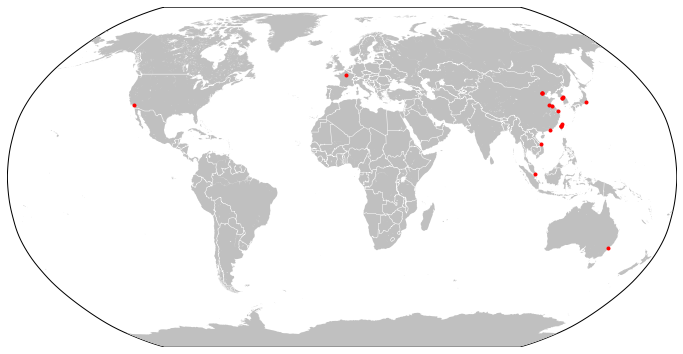

In [12]:
df = pd.read_sql_query("SELECT * FROM dns_measurements WHERE protocol = 'tcp' AND r_code IS NOT NULL AND NOT cache_warming", connection)
grouped_df = df.groupby("ip")
mean_df = grouped_df["total_time"].mean()
mean_df = mean_df.reset_index()
largestTCP = mean_df.nlargest(20, "total_time")

ips = largestTCP["ip"].tolist()
locations = []
for ip in ips:
    if ip in data:
        locations.append({ "lon": data[ip]["lon"], "lat": data[ip]["lat"] })

# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
plt.figure(figsize=(12,22))
worldMap = Basemap(projection='robin', lon_0=0, resolution='i')
worldMap.drawcountries(color='#ffffff', linewidth=0.5)
worldMap.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
x, y = worldMap(list(map(lambda x: x["lon"], locations)), list(map(lambda x: x["lat"], locations)))
plt.plot(x, y, 'bo', color = 'r', markersize = 3)
plt.show()

### TLS

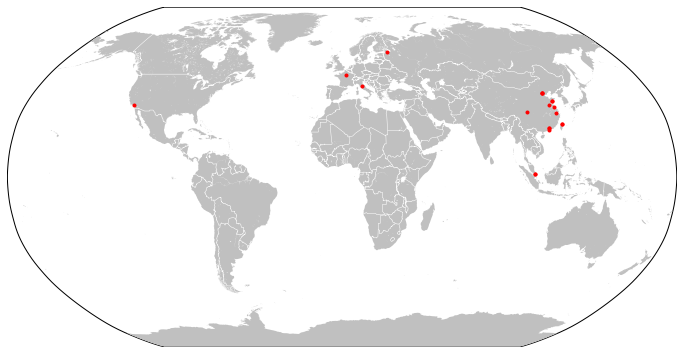

In [13]:
df = pd.read_sql_query("SELECT * FROM dns_measurements WHERE protocol = 'tls' AND r_code IS NOT NULL AND NOT cache_warming", connection)
grouped_df = df.groupby("ip")
mean_df = grouped_df["total_time"].mean()
mean_df = mean_df.reset_index()
largestTLS = mean_df.nlargest(20, "total_time")

ips = largestTLS["ip"].tolist()
locations = []
for ip in ips:
    if ip in data:
        locations.append({ "lon": data[ip]["lon"], "lat": data[ip]["lat"] })

# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
plt.figure(figsize=(12,22))
worldMap = Basemap(projection='robin', lon_0=0, resolution='i')
worldMap.drawcountries(color='#ffffff', linewidth=0.5)
worldMap.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
x, y = worldMap(list(map(lambda x: x["lon"], locations)), list(map(lambda x: x["lat"], locations)))
plt.plot(x, y, 'bo', color = 'r', markersize = 3)
plt.show()

### HTTPS

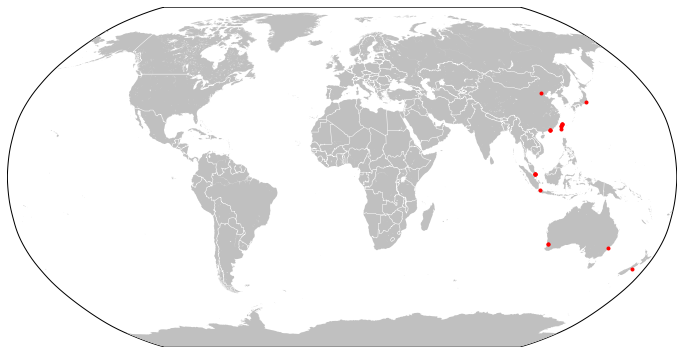

In [14]:
df = pd.read_sql_query("SELECT * FROM dns_measurements WHERE protocol = 'https' AND r_code IS NOT NULL AND NOT cache_warming", connection)
grouped_df = df.groupby("ip")
mean_df = grouped_df["total_time"].mean()
mean_df = mean_df.reset_index()
largestHTTPS = mean_df.nlargest(20, "total_time")

ips = largestHTTPS["ip"].tolist()
locations = []
for ip in ips:
    if ip in data:
        locations.append({ "lon": data[ip]["lon"], "lat": data[ip]["lat"] })

# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
plt.figure(figsize=(12,22))
worldMap = Basemap(projection='robin', lon_0=0, resolution='i')
worldMap.drawcountries(color='#ffffff', linewidth=0.5)
worldMap.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
x, y = worldMap(list(map(lambda x: x["lon"], locations)), list(map(lambda x: x["lat"], locations)))
plt.plot(x, y, 'bo', color = 'r', markersize = 3)
plt.show()

### Combined

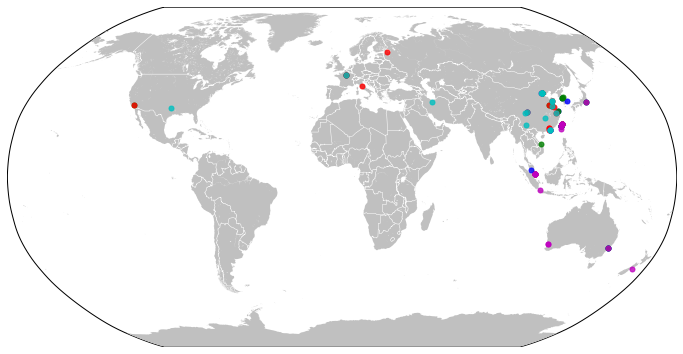

In [15]:
plt.figure(figsize=(12,22))
worldMap = Basemap(projection='robin', lon_0=0, resolution='i')
worldMap.drawcountries(color='#ffffff', linewidth=0.5)
worldMap.fillcontinents(color='#c0c0c0', lake_color='#ffffff')

largestList = [largestUDP, largestTCP, largestTLS, largestHTTPS, largestQUIC]
colors = [Colors.udp, Colors.tcp, Colors.tls, Colors.https, Colors.quic]
for i, frame in enumerate(largestList):
    ips = frame["ip"].tolist()
    locations = []
    for ip in ips:
        if ip in data:
            locations.append({ "lon": data[ip]["lon"], "lat": data[ip]["lat"] })
    x, y = worldMap(list(map(lambda x: x["lon"], locations)), list(map(lambda x: x["lat"], locations)))
    plt.plot(x, y, 'bo', color = colors[i], markersize = 5, alpha = 0.8)
plt.show()

## Experiment

In [17]:
quic = largestQUIC.copy(True)

In [18]:
quic["total_time"] = quic["total_time"].div(1000000)
quic

,ip,total_time
705,47.94.3.71,34578.650885
71,107.155.83.188,10795.689990
171,124.70.72.221,10119.695740
616,39.106.194.18,4122.621622
263,153.99.56.198,3777.147853
105,113.218.242.227,3584.865677
617,39.106.231.126,3359.368021
682,46.32.10.110,3315.989962
139,120.53.239.212,3108.840194
97,111.67.207.82,3078.158389


In [31]:
rtt = pd.read_sql_query("SELECT hop_ip, rtt FROM traceroutes WHERE (dest_port = 784 OR dest_port = 8853) AND hop_ip IN {}".format(str(tuple(quic["ip"].tolist()))), connection)
grouped_rtt = rtt.groupby("hop_ip")
mean_rtt = grouped_rtt["rtt"].mean()
mean_rtt = mean_rtt.reset_index()
mean_rtt["rtt"] = mean_rtt["rtt"].div(1000000)
mean_rtt = mean_rtt.rename(columns = { "hop_ip": "ip" })
mean_rtt

,ip,rtt
0,101.132.243.216,205.002749
1,107.155.83.188,124.102597
2,111.67.207.82,326.820649
3,113.218.242.227,241.939377
4,120.53.239.212,162.490757
5,124.70.72.221,173.610927
6,153.99.56.198,344.050978
7,182.134.133.129,266.541751
8,193.112.39.18,222.819834
9,211.149.233.189,257.012167


In [37]:
print(pd.merge(quic, mean_rtt, on = "ip").to_markdown())

|    | ip              |   total_time |     rtt |
|---:|:----------------|-------------:|--------:|
|  0 | 47.94.3.71      |     34578.7  | 187.7   |
|  1 | 107.155.83.188  |     10795.7  | 124.103 |
|  2 | 124.70.72.221   |     10119.7  | 173.611 |
|  3 | 39.106.194.18   |      4122.62 | 171.176 |
|  4 | 153.99.56.198   |      3777.15 | 344.051 |
|  5 | 113.218.242.227 |      3584.87 | 241.939 |
|  6 | 39.106.231.126  |      3359.37 | 173.089 |
|  7 | 46.32.10.110    |      3315.99 | 100.452 |
|  8 | 120.53.239.212  |      3108.84 | 162.491 |
|  9 | 111.67.207.82   |      3078.16 | 326.821 |
| 10 | 47.107.67.12    |      3045.5  | 227.34  |
| 11 | 220.165.15.137  |      2929.88 | 245.913 |
| 12 | 211.149.233.189 |      2916.93 | 257.012 |
| 13 | 47.105.141.0    |      2858.56 | 279.29  |
| 14 | 101.132.243.216 |      2825.45 | 205.003 |
| 15 | 47.106.75.179   |      2452.81 | 239.254 |
| 16 | 42.98.247.22    |      2429.85 | 267.61  |
| 17 | 193.112.39.18   |      2254.38 | 222.82  |
